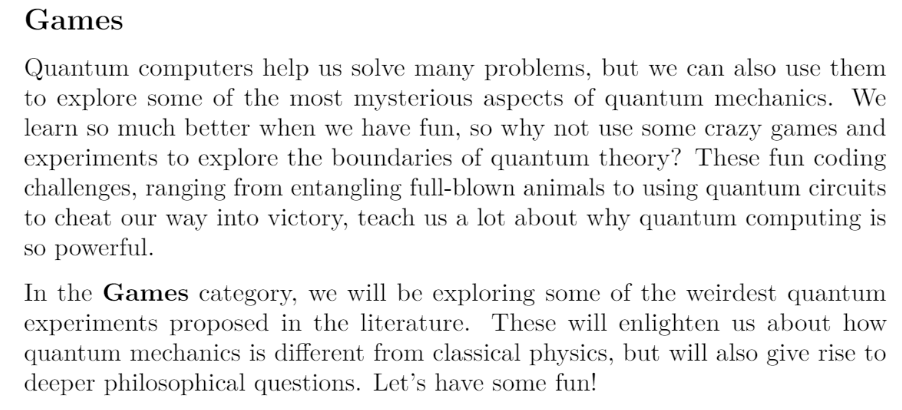

# 100 Points

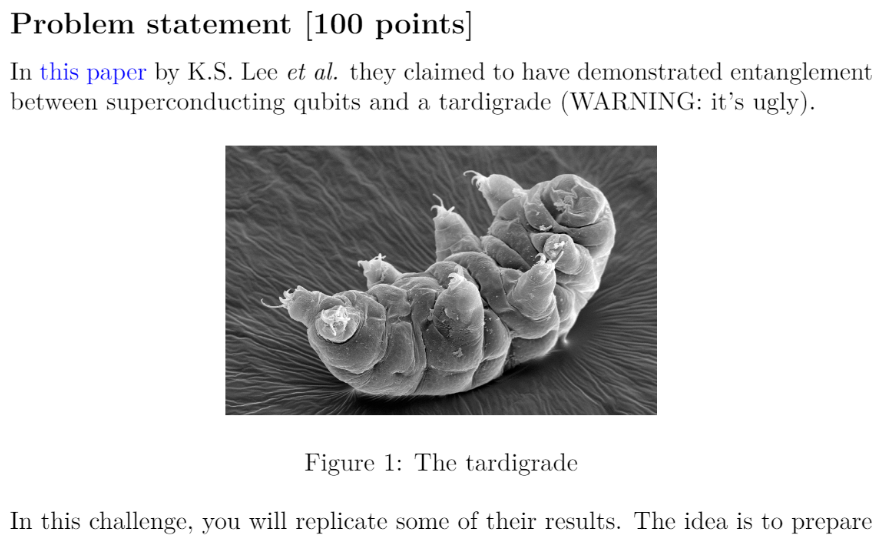

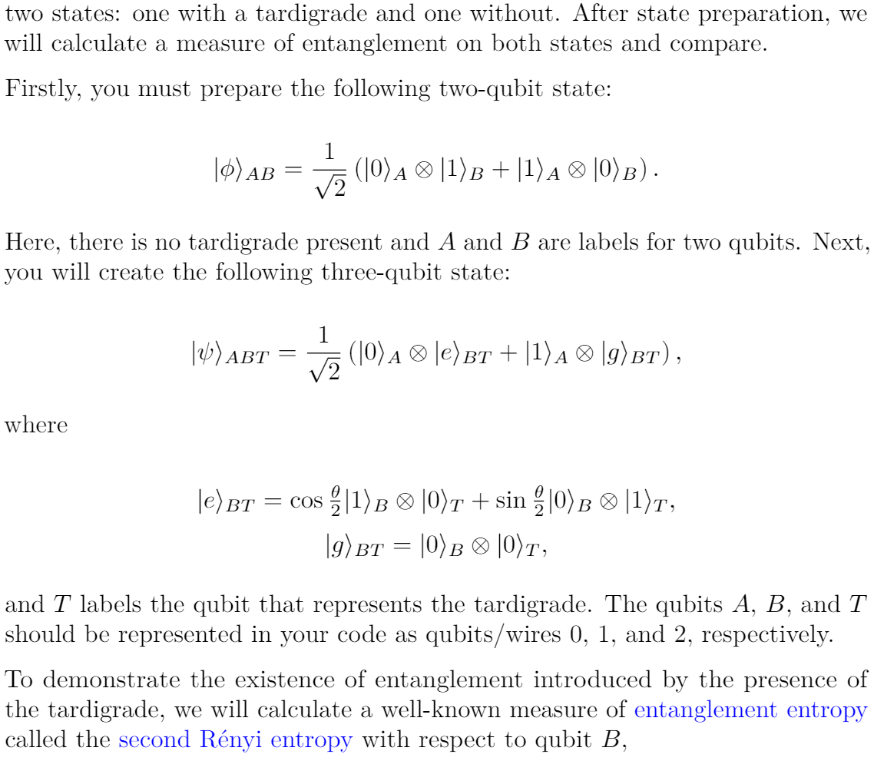

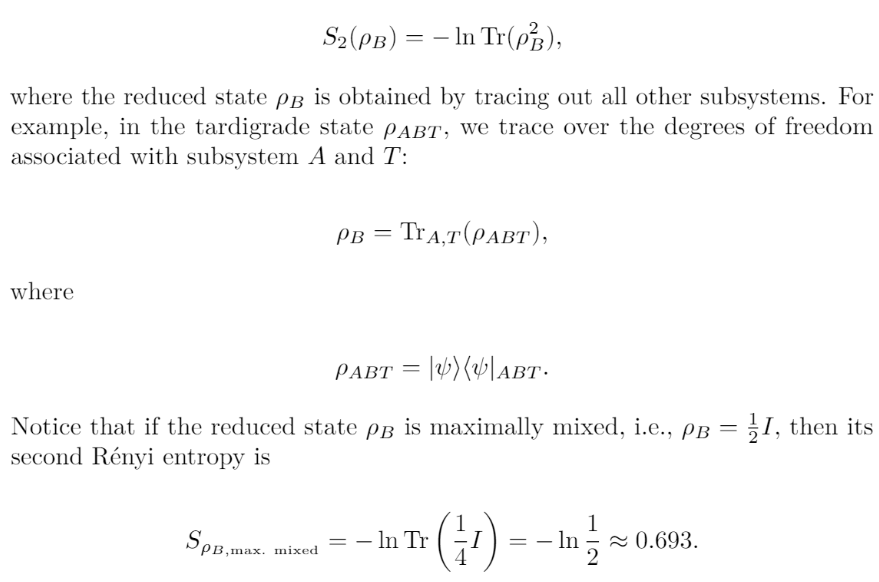

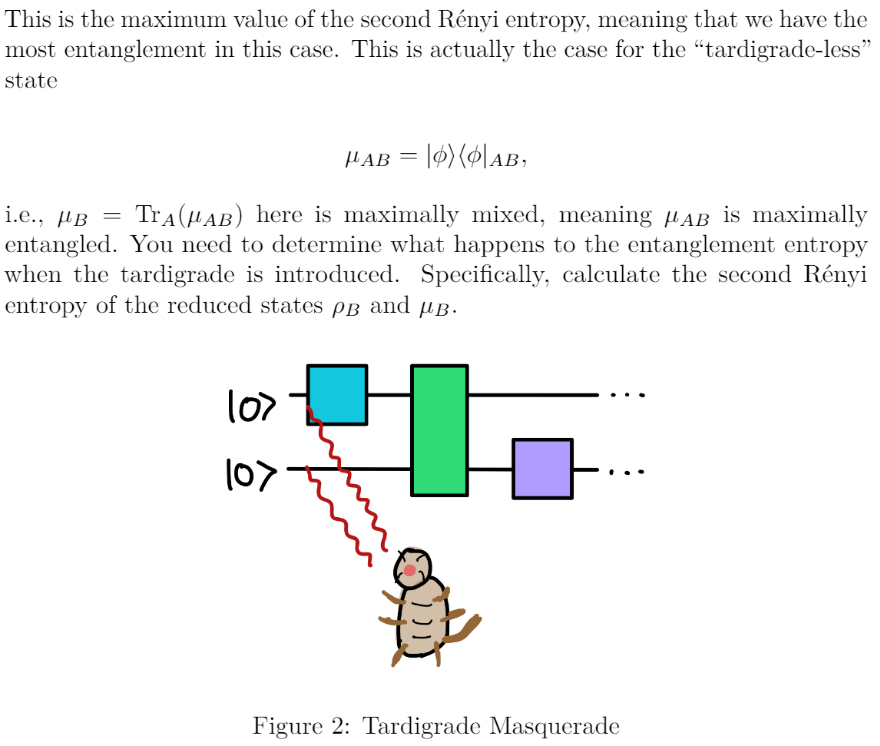

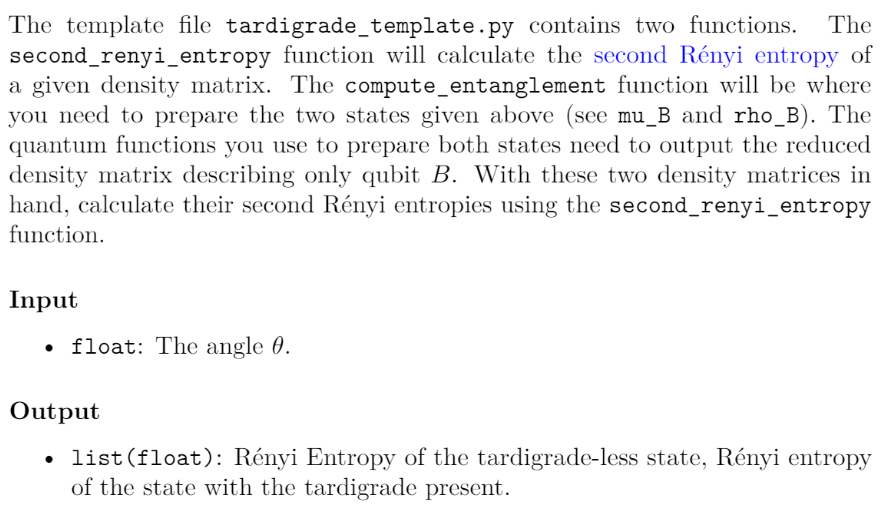

In [1]:
import sys
import pennylane as qml
from pennylane import numpy as np


def second_renyi_entropy(rho):
    """Computes the second Renyi entropy of a given density matrix."""
    # DO NOT MODIFY anything in this code block
    rho_diag_2 = np.diagonal(rho) ** 2.0
    return -np.real(np.log(np.sum(rho_diag_2)))


def compute_entanglement(theta):
    """Computes the second Renyi entropy of circuits with and without a tardigrade present.
    Args:
        - theta (float): the angle that defines the state psi_ABT
    Returns:
        - (float): The entanglement entropy of qubit B with no tardigrade
        initially present
        - (float): The entanglement entropy of qubit B where the tardigrade
        was initially present
    """

    dev = qml.device("default.qubit", wires=3)
    state = np.array([0, np.sin(theta/2)/np.sqrt(2), np.cos(theta/2)/np.sqrt(2), 0, 1/np.sqrt(2), 0, 0, 0])
    # QHACK #
    @qml.qnode(dev)
    def circuit():
        qml.MottonenStatePreparation(state_vector= state, wires = range(3))
        return qml.state()

    dev1 = qml.device("default.qubit", wires = 2)
    state1 = np.array([0, 1/np.sqrt(2), 1/np.sqrt(2), 0])

    @qml.qnode(dev1)
    def circuit1():
        qml.MottonenStatePreparation(state_vector=state1, wires=range(2))
        return qml.state()

    a = circuit()
    a = a[np.newaxis]
    a = a.T.dot(a)

    def partial_trace(rho, qubit_2_keep):
        """ Calculate the partial trace for qubit system
        Parameters
        ----------
        rho: np.ndarray
            Density matrix
        qubit_2_keep: list
            Index of qubit to be kept after taking the trace
        Returns
        -------
        rho_res: np.ndarray
            Density matrix after taking partial trace
        """
        num_qubit = int(np.log2(rho.shape[0]))
        qubit_axis = [(i, num_qubit + i) for i in range(num_qubit)
                      if i not in qubit_2_keep]
        minus_factor = [(i, 2 * i) for i in range(len(qubit_axis))]
        minus_qubit_axis = [(q[0] - m[0], q[1] - m[1])
                            for q, m in zip(qubit_axis, minus_factor)]
        rho_res = np.reshape(rho, [2, 2] * num_qubit)
        qubit_left = num_qubit - len(qubit_axis)
        for i, j in minus_qubit_axis:
            rho_res = np.trace(rho_res, axis1=i, axis2=j)
        if qubit_left > 1:
            rho_res = np.reshape(rho_res, [2 ** qubit_left] * 2)

        return rho_res

    phob = partial_trace(a, [1])
    a1 = circuit1()
    a1 = a1[np.newaxis]
    a1 = a1.T.dot(a1)
    phob1 = partial_trace(a1, [1])
    e1 = second_renyi_entropy(phob)
    e2 = second_renyi_entropy(phob1)

    return e2, e1

    # QHACK #

theta = np.array([4.91504584447079])

S2_without_tardigrade, S2_with_tardigrade = compute_entanglement(theta)
print('Obtained answer:',[S2_without_tardigrade, S2_with_tardigrade])
print('Expected answer: [0.6931471805599457, 0.545165726123828]')

C:\Users\a.podlesnyy\anaconda3\lib\site-packages\autograd\numpy\numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return _np.array(args, *array_args, **array_kwargs)


AttributeError: 'int' object has no attribute 'arctan2'